# Milestone 3: Data Exploration

#### Evan Brown, Felix Ruano, Evan Brown

In [201]:
# food inspection database
data_FI = pd.read_csv('datasets/Food_Inspections.csv')

In [140]:
import re

# cleaned data. will be inputted into DF after cleaning
viol_list_of_lists = []

for i, viol in enumerate(data_FI.Violations):
    # for each establishment
    viols = []
    
    # if nan, no complaints
    if pd.isnull(viol):
        viol_list_of_lists.append(viols)
    else:
        # split into separate complaints
        viols = viol.split(' | ')
        for j, complaint in enumerate(viols):
            complaint = complaint.split(' - Comments: ')[0]
            viols[j] = complaint
        viol_list_of_lists.append(viols)

In [141]:
violations_df = pd.Series([item for sublist in viol_list_of_lists for item in sublist])

violation_code_dict = {}
for viol in violations_df:
    code = viol.split('. ')[0]
    viol_ = viol.split('. ')[1]
    violation_code_dict[code] = viol_
    
# number of violations per establisment
no_viols = [len(x) for x in viol_list_of_lists]

no_viols_df = pd.Series(data=no_viols, index=data_FI['Inspection ID'], name='Number of Violations')

In [142]:
data_FI['Results'].unique()

array(['Pass', 'No Entry', 'Pass w/ Conditions', 'Fail', 'Out of Business',
       'Not Ready', 'Business Not Located'], dtype=object)

## EVAN: digging into data regarding inspection outcomes. Yelp API

# Inspection Results

In [41]:
inspection_types = data_FI['Inspection Type'].unique()
inspection_types = set([str(l).lower() for l in inspection_types])

In [202]:
data_FI.groupby(data_FI['Inspection Type']).sum()

,Inspection ID,License #,Zip,Latitude,Longitude
Inspection Type,,,,,
1315 license reinspection,614488,2.113684e+06,6.060400e+04,4.187801e+01,-8.763319e+01
ADDENDUM,634841,1.980406e+06,6.064700e+04,4.192370e+01,-8.769841e+01
Business Not Located,176967,1.193504e+06,6.060900e+04,4.182336e+01,-8.767419e+01
CANVAS,598256,1.227407e+06,6.060800e+04,4.185040e+01,-8.768050e+01
CANVASS,490776,1.716761e+06,6.062200e+04,4.189890e+01,-8.766722e+01
CANVASS FOR RIB FEST,98422,4.040000e+02,6.061800e+04,4.195954e+01,-8.768848e+01
CANVASS RE INSPECTION OF CLOSE UP,429101,1.991236e+06,6.062500e+04,4.196851e+01,-8.768834e+01
CANVASS SCHOOL/SPECIAL EVENT,1118265,2.046680e+06,6.061700e+04,4.169194e+01,-8.753206e+01
CANVASS SPECIAL EVENTS,1118288,1.096300e+04,6.061700e+04,4.173582e+01,-8.755125e+01


    Many of the inspection types are mistyped or barely used. For example, there is only one record of "CANVASS FOR RIB FEST" (passed), and for "TWO PEOPLE ATE AND GOT SICK" (violations). Many inspection strings are also one character off, for example there is a field for "Canvass Special Events" and "Canvass/Special Event". The same holds for 'LICENSE TASK FORCE / NOT -FOR-PROFIT CLU' and 'LICENSE TASK FORCE / NOT -FOR-PROFIT CLUB'. First, lets examine how common different inspection types are. Clearly some values are more common than others, so lets examine which these are. We can at the same time see that a few categories seem to jump out.

In [209]:
data_FI[data_FI['Inspection Type'] == 'TWO PEOPLE ATE AND GOT SICK.'.upper()]['Violations']

Series([], Name: Violations, dtype: object)

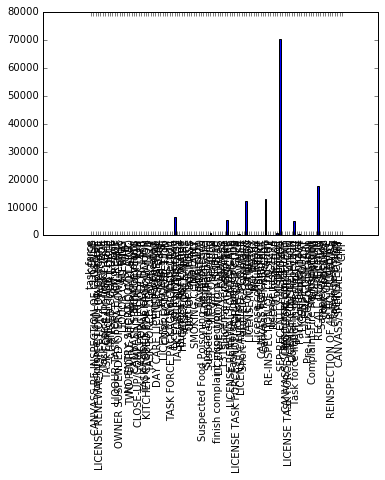

In [98]:
inspection_type_groups = data_FI.groupby(data_FI['Inspection Type']).groups

d = {k: len(v) for k, v in inspection_type_groups.iteritems()}

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), d.keys(), rotation = 'vertical')
plt.show()

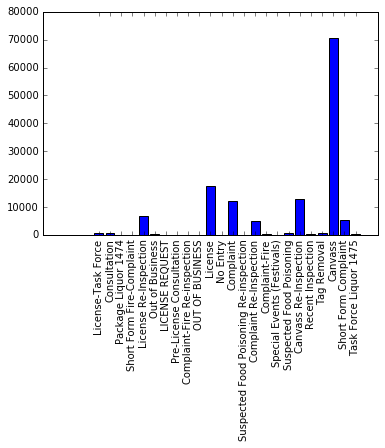

In [71]:
d_most_common = {k: len(v) for k, v in inspection_type_groups.iteritems() if len(v) > 10}

plt.bar(range(len(d_most_common)), d_most_common.values(), align='center')
plt.xticks(range(len(d_most_common)), d_most_common.keys(), rotation = 'vertical')
plt.show()

    Now -- To simplify matters I broke up the inspection types into 5 main categories: "Canvass", "Complaint", "License", "Task Force", and "Other". Most of the inspection types fell into one of these categories, although it took a little regular expression maneuvering to fit the given types into these five. I then examined how the number of violations differed with respect to each of the 5, to see if there was any visible correlation. 

In [189]:
def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

def list_for_word(word, dic):
    return [k for k in dic.keys() if findWholeWord(word)(k) != None]

task_force_strings = list_for_word("task force", d)
license_strings = list_for_word("license", d)
complaint_strings = list_for_word("complaint", d)
canvass_strings = (list_for_word("canvass", d) + list_for_word("canvas", d))

def simplify_string(x):
    if x in task_force_list:
        return "Task Force"
    elif x in license_strings:
        return "License"
    elif x in complaint_strings:
        return "Complaint"
    elif x in canvass_strings:
        return "Canvass"
    else:
        return "Other"

In [194]:
canvass_strings

['CANVASS RE INSPECTION OF CLOSE UP',
 'CANVASS SPECIAL EVENTS',
 'CANVASS',
 'CANVASS FOR RIB FEST',
 'Canvass Re-Inspection',
 'Canvass',
 'CANVASS SCHOOL/SPECIAL EVENT',
 'CANVASS/SPECIAL EVENT',
 'CANVAS']

In [203]:
data_FI['Inspection Type'] = data_FI['Inspection Type'].map(simplify_string)
#inspection_type_viol_df = pd.DataFrame([data_FI['Inspection Type'], no_viols_df]).transpose()
#data_FI.merge(no_viols_df.to_frame(), how = 'inner', on = 'Inspection ID')
data_FI['Num Violations'] = no_viols_df.values

Now that we've simplified the inspection types, we create a dataframe of just the inspection types and examine whether the number of violations has anything to do with the type of inspection done via histograms.

In [205]:
inspections_violations_df = pd.concat([data_FI['Inspection Type'], data_FI['Num Violations']], axis=1, keys=['Inspection Type', 'Num Violations'])
inspections_violations_df.groupby('Inspection Type').agg(['mean', 'count'])

Num Violations       
                          mean  count
Inspection Type                      
Canvass               3.624382  83276
Complaint             4.770034  22986
License               3.162811  24292
Other                 3.335510   2757
Task Force            2.409762    881

Just looking at the means, we can see that restaurants receive about 1 more violation on average if the reason for inspection was a complaint as opposed to anything else. Interestingly simple canvassing resulted in a fairly high number of violations, while task force visits resulted in comparatively few.

Inspection Type
Canvass       [[Axes(0.125,0.125;0.775x0.775)]]
Complaint     [[Axes(0.125,0.125;0.775x0.775)]]
License       [[Axes(0.125,0.125;0.775x0.775)]]
Other         [[Axes(0.125,0.125;0.775x0.775)]]
Task Force    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

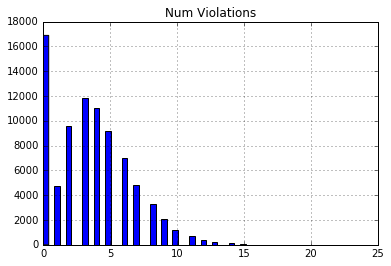

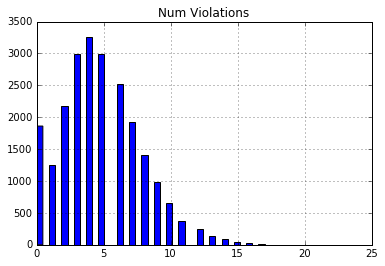

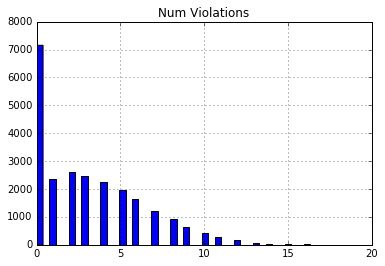

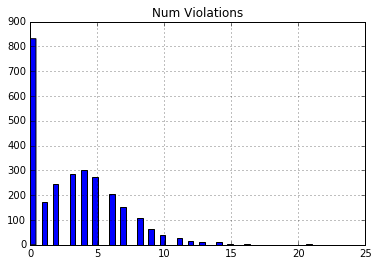

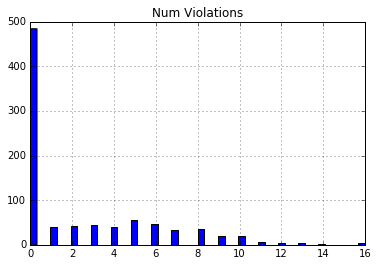

In [210]:
inspections_violations_df.groupby('Inspection Type').hist(bins = 50)

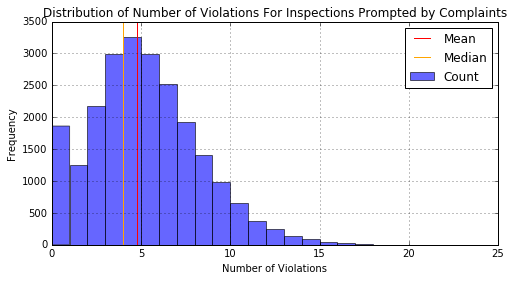

In [219]:
complaints_df = inspections_violations_df[inspections_violations_df['Inspection Type'] == 'Complaint']

# visualization
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots(1, 1)

# each number of violations assigned a bin
ax = complaints_df['Num Violations'].hist(bins=complaints_df['Num Violations'].max(), alpha=0.6, label='Count')
ax.axvline(complaints_df['Num Violations'].mean(), color='red', label='Mean')
ax.axvline(complaints_df['Num Violations'].median(), color='orange', label='Median')
ax.set_title('Distribution of Number of Violations For Inspections Prompted by Complaints')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Violations')
ax.legend();


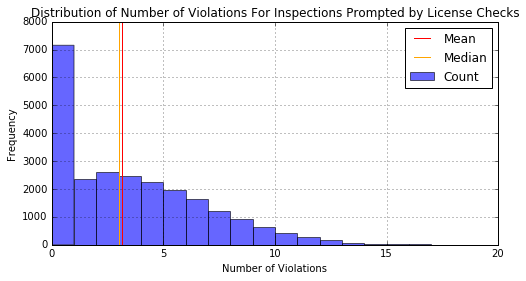

In [220]:
license_df = inspections_violations_df[inspections_violations_df['Inspection Type'] == 'License']

# visualization
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots(1, 1)

# each number of violations assigned a bin
ax = license_df['Num Violations'].hist(bins=license_df['Num Violations'].max(), alpha=0.6, label='Count')
ax.axvline(license_df['Num Violations'].mean(), color='red', label='Mean')
ax.axvline(license_df['Num Violations'].median(), color='orange', label='Median')
ax.set_title('Distribution of Number of Violations For Inspections Prompted by License Checks')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Violations')
ax.legend();

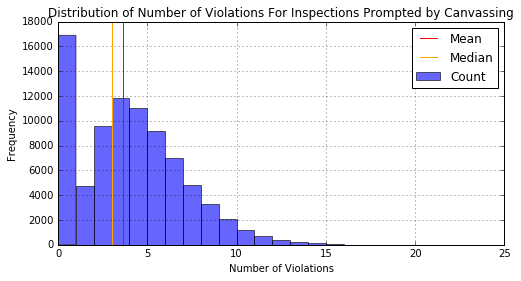

In [221]:
canvass_df = inspections_violations_df[inspections_violations_df['Inspection Type'] == 'Canvass']

# visualization
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots(1, 1)

# each number of violations assigned a bin
ax = canvass_df['Num Violations'].hist(bins=canvass_df['Num Violations'].max(), alpha=0.6, label='Count')
ax.axvline(canvass_df['Num Violations'].mean(), color='red', label='Mean')
ax.axvline(canvass_df['Num Violations'].median(), color='orange', label='Median')
ax.set_title('Distribution of Number of Violations For Inspections Prompted by Canvassing')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Violations')
ax.legend();

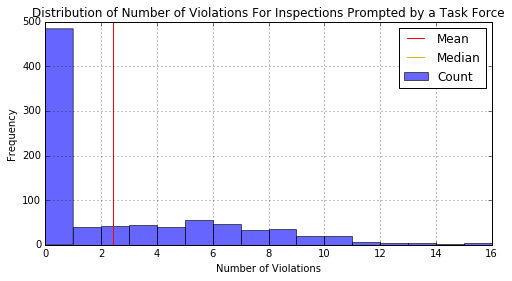

In [222]:
tf_df = inspections_violations_df[inspections_violations_df['Inspection Type'] == 'Task Force']

# visualization
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots(1, 1)

# each number of violations assigned a bin
ax = tf_df['Num Violations'].hist(bins=tf_df['Num Violations'].max(), alpha=0.6, label='Count')
ax.axvline(tf_df['Num Violations'].mean(), color='red', label='Mean')
ax.axvline(tf_df['Num Violations'].median(), color='orange', label='Median')
ax.set_title('Distribution of Number of Violations For Inspections Prompted by a Task Force')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Violations')
ax.legend();

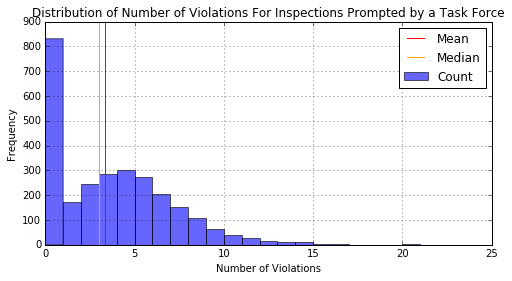

In [223]:
other_df = inspections_violations_df[inspections_violations_df['Inspection Type'] == 'Other']

# visualization
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots(1, 1)

# each number of violations assigned a bin
ax = other_df['Num Violations'].hist(bins=other_df['Num Violations'].max(), alpha=0.6, label='Count')
ax.axvline(other_df['Num Violations'].mean(), color='red', label='Mean')
ax.axvline(other_df['Num Violations'].median(), color='orange', label='Median')
ax.set_title('Distribution of Number of Violations For Inspections Prompted by a Task Force')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Violations')
ax.legend();

Now we examine the Yelp API to see if we can get anything valuable from it, and cross reference. Ideally we'll be able to cross reference restaurants and see if a restuarant's rating corresponds to the # of violations associated with it. First we'll just make sure the account works, but later on we'lldo more matching of the dataset to yelp results -- to do this we may also have to escape rate limiting issues with querying the API. 

## Yelp

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/evanbrown/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from yelp.client import Client
from yelp.oauth1_authenticator import Oauth1Authenticator

auth = Oauth1Authenticator(
    consumer_key= 'Oy7XguSi2LNqkezRy9FpLg',a
    consumer_secret= 'vCd553h9VA481BjS2aoy_zy5uwM',
    token= 'A1038kcxEgES1ARXf8xpAWHr8y_MUaWo',
    token_secret= 'rqXou8gBHNWYkUcE1_n2d3JAihI'
)

client = Client(auth)

In [4]:
type(client)

yelp.client.Client

In [18]:
params = {
    'term': 'food',
    'lang': 'eng'
}

results = client.search('Chicago', **params)

In [21]:
results.businesses[0].name

u'The Purple Pig'